In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv('titanic_mod.csv')

In [13]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])
 
    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]
 
    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]
 
    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
   
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]
 
    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]
 
    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')
 
    return metadata

In [15]:
metadata(df)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,PassengerId,int64,0,0.00,891,100.00,1.00,891.0000,257.353842
1,Survived,int64,0,0.00,2,0.22,0.00,1.0000,0.486592
2,Pclass,int64,0,0.00,3,0.34,1.00,3.0000,0.836071
3,Name,object,0,0.00,891,100.00,NaN,NaN,NaN
4,Sex,object,0,0.00,2,0.22,NaN,NaN,NaN
5,Age,float64,177,19.87,88,9.88,0.42,80.0000,14.526497
6,SibSp,int64,0,0.00,7,0.79,0.00,8.0000,1.102743
7,Parch,int64,0,0.00,7,0.79,0.00,6.0000,0.806057
8,Ticket,object,0,0.00,681,76.43,NaN,NaN,NaN
9,Fare,float64,0,0.00,248,27.83,0.00,512.3292,49.693429


<Axes: >

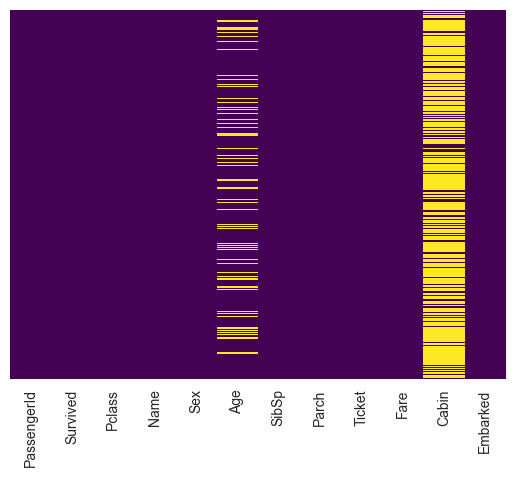

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

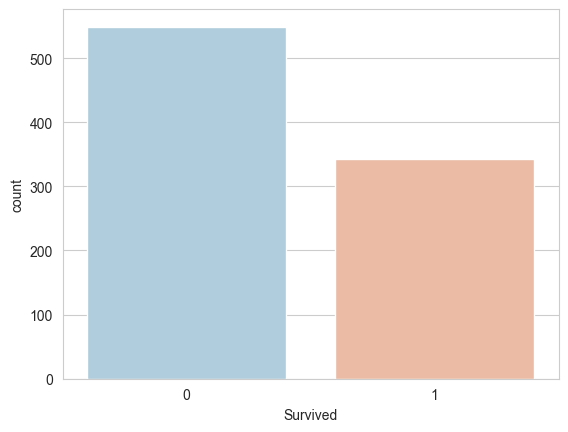

In [17]:
# visual the survived column
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

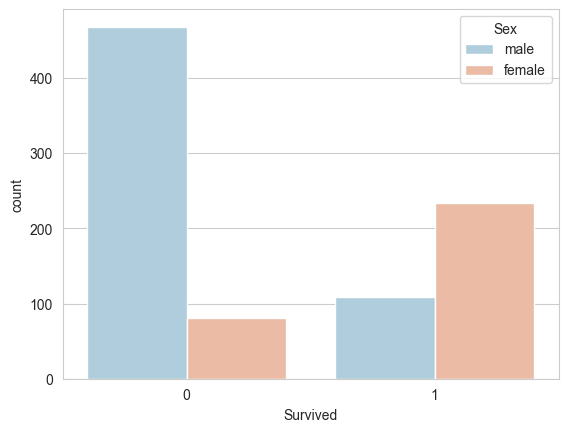

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex' ,data=df, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

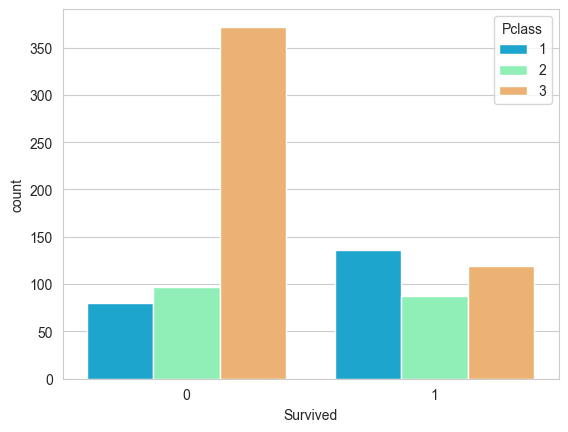

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

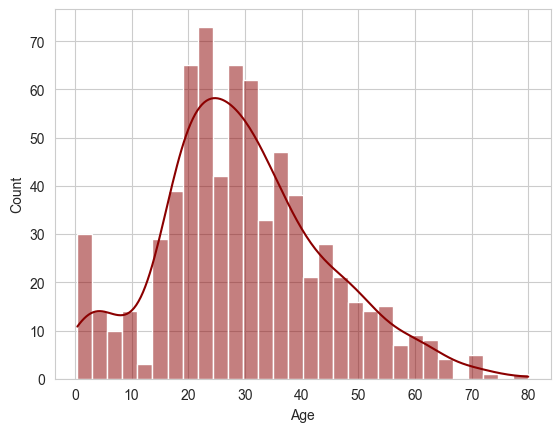

In [20]:
sns.histplot(df['Age'].dropna(), kde=True, color='darkred', bins=30)

<Axes: >

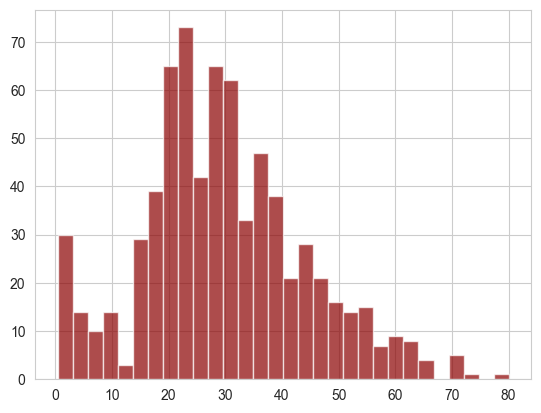

In [21]:
df['Age'].hist(bins=30, color='darkred', alpha=0.7)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

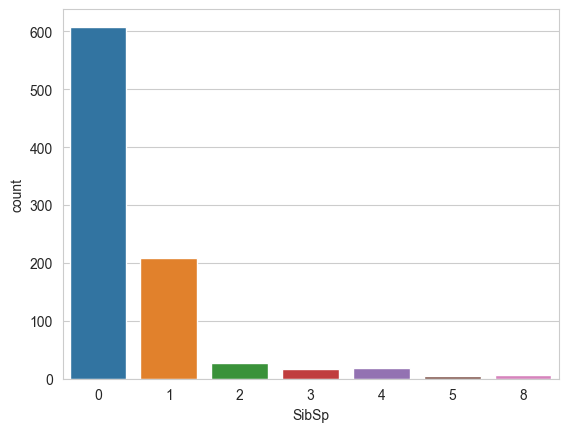

In [23]:
sns.countplot(x='SibSp', data=df)

<Axes: xlabel='Fare', ylabel='Count'>

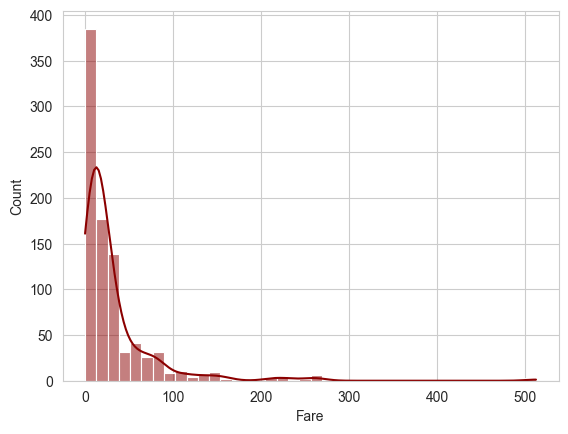

In [24]:
sns.histplot(df['Fare'], kde=True, color='darkred', bins=40)

In [25]:
df.drop('Cabin', axis=1, inplace=True)

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [29]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [30]:
df = pd.concat([df.drop(['Sex', 'Embarked'], axis=1), sex, embark], axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [31]:
df.drop(['Name','PassengerId','Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
# normalize the Age and Fare columns in df only
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Age', 'Fare']])
scaled_features = scaler.transform(df[['Age', 'Fare']])
df[['Age', 'Fare']] = scaled_features
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,-0.527669,1,0,-0.516380,1,0,1
1,1,1,0.577094,1,0,0.694046,0,0,0
2,1,3,-0.251478,0,0,-0.503620,0,0,1
3,1,1,0.369951,1,0,0.350326,0,0,1
4,0,3,0.369951,0,0,-0.501257,1,0,1


In [33]:
# building the logistic regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.30, random_state=666)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

In [34]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[102,  17],
       [ 26,  69]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       119
           1       0.80      0.73      0.76        95

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



In [36]:
# do a grid search to find the best parameters for my logistic regression model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(), param_grid, verbose=3, scoring='accuracy')
grid.fit(X_train, y_train)

grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.790 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.840 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.720 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.778 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.818 total time=   0.0s
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l

c:\Users\yuyum\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\yuyum\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\yuyum\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\yuyum\AppData\Local\Programs\Pyth

{'C': 1, 'penalty': 'l2'}

In [37]:
# building the logistic regression model with the best parameters

logmodel = LogisticRegression(C=1, penalty='l2')
logmodel.fit(X_train, y_train)

predictions_best = logmodel.predict(X_test)


confusion_matrix(y_test, predictions)

array([[102,  17],
       [ 26,  69]], dtype=int64)

In [38]:
# classification report
print(classification_report(y_test, predictions_best))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       119
           1       0.80      0.73      0.76        95

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



In [39]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions_best)

0.7990654205607477

In [42]:
import sys
!{sys.executable} -m pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
  Using cached lightgbm-4.1.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.1.0-py3-none-win_amd64.whl (1.3 MB)


In [43]:
# use lightgbm to build a model
import lightgbm as lgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.30, random_state=666)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'num_leaves': 31, 'objective': 'binary', 'metric': 'auc'}
param['metric'] = ['auc', 'binary_logloss']

num_round = 100
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

# predict
y_pred = bst.predict(X_test)
y_pred


[LightGBM] [Info] Number of positive: 193, number of negative: 305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 498, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.387550 -> initscore=-0.457622
[LightGBM] [Info] Start training from score -0.457622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


array([9.84658519e-01, 1.33087391e-01, 4.16259809e-02, 9.56735541e-01,
       2.30634114e-01, 9.55134228e-01, 2.79420760e-02, 9.63368848e-01,
       6.62499616e-01, 6.49755065e-02, 1.71805820e-01, 9.98112659e-01,
       6.20355842e-01, 1.06887240e-02, 6.61041638e-01, 2.10160633e-02,
       5.48328268e-01, 3.16842074e-01, 1.14252755e-01, 9.91033672e-01,
       8.89909171e-01, 9.57879571e-01, 7.71560638e-01, 6.61094043e-03,
       8.18358227e-02, 8.28400843e-01, 5.26500582e-01, 8.24141908e-01,
       6.13512360e-03, 1.22531347e-01, 9.70707574e-01, 8.40777534e-02,
       2.79420760e-02, 3.23455355e-01, 9.96674227e-01, 3.33767982e-01,
       9.04189961e-01, 2.46130670e-01, 5.25047098e-01, 9.54097827e-01,
       9.87793568e-01, 5.35064713e-02, 6.72449132e-01, 8.46044228e-01,
       2.45666010e-02, 4.12830996e-02, 3.99883172e-02, 2.21646057e-01,
       1.67611350e-01, 9.09785954e-01, 9.89535632e-01, 6.53495017e-01,
       5.47801617e-01, 8.18849260e-01, 1.64406568e-02, 8.01491017e-02,
      

In [44]:
# convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0


# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       119
           1       0.80      0.78      0.79        95

    accuracy                           0.81       214
   macro avg       0.81      0.81      0.81       214
weighted avg       0.81      0.81      0.81       214

